<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2021_2022/Examens/202007_Repesca_Programacio%CC%81n_(Soluciones).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MN1: 2º parcial (programación) 03/07/2020**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones de edición del Notebook y entrega**

*   Abre el Notebook desde GitHub ("Open in Colab") y genera una copia en tu Drive ("Guardar una copia en Drive"). Edita esa copia para el examen. 
*   Renombra esa copia como usando tu NIU como nombre de archivo: "NIU.ipynb" (*por ejemplo, 2055007.ipynb*) 
*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu examan) en la cabecera de este Notebook.
*   Al final del examen, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/FQ9X). Asegurate de que el fichero tiene el nombre correcto.
*   Podéis volver a subir el fichero si creéis que hay un error pero sólo consideraremos la última versión, y dentro del horario establecido.
*   **NOTA** Antes de entregar o dar por finalizado cada ejercicio, es recomendable reiniciar el entorno de ejecución para ver que se ejecuta todo de forma correcta: "Entorno de ejecución >> Reiniciar entorno de ejecución",y luego "Entorno de ejecución >> Ejecutar todas".

<hr>

**Instrucciones del examen**

*   **Si haces la recuperación o subir nota del segundo parcial, se realiza todo este examen. El horario es de 12h30 a 15h30. No se aceptarán entregas pasada esa hora.**
*   **Si has optado por subir nota en los dos parciales, tienes que hacer el ejercicio 2 y 3 de este Notebook. El horario es de 12h30 a 14h00. No se aceptarán entregas pasada esa hora de esta parte del examen. La parte del 1er parcial se realizará de 14h00 a 15h30.**
*   Podéis consultar apuntes, entregas o usar internet para buscar información, pero no comunicaros entre vosotros/as.
*   Es obligatorio conectarse a la sesión de MS Teams durante la realización del examen. [Link](http://cern.ch/go/6mhN)
*   Podéis utilizar el chat para hacer consultas durante el examen y si hay una duda general que afecte a todos, se puede comentar en voz alta utilizando esta herramienta. **No copieis partes de código en el chat**.
*   **NOTA:** Se llamará aleatoriamente a ciertos alumnos para que nos expliquen cómo han hecho el examen, antes de publicar las notas.

<hr>

## **EXAMEN**

In [ ]:
# Ejecuta esta parte de código para importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

## <font color='green'>**> Ejercicio #1 [3 puntos]**</font>

A partir de la distribución t-student vamos a realizar una serie de gráficas:

**1.1 [1 punto]:** Dibuja la distribución t-student para nof=10 e indica con unas líneas verticales el área correspondiente a un intervalo de confianza del 95%.

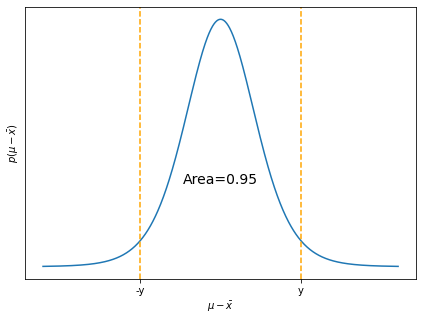

In [ ]:
# Ejercicio 1.1

x = np.linspace(-5,5, 1000)
N = 10
CI = 0.95
Z = abs(ss.t.ppf((1 - CI) / 2,N-1))
y = abs(ss.t.pdf(x,N-1))

plt.figure(figsize=(7, 5))
plt.plot(x,y)  
plt.text(0,np.max(y) / 3, 'Area=0.95', fontdict={'size':14}, horizontalalignment='center')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='orange')
plt.xticks([-Z, Z], ['-y', 'y'])
plt.yticks([])
plt.ylabel(r'$p(\mu - \bar{x})$')
plt.xlabel(r'$\mu - \bar{x}$')
plt.show()

**1.2 [1 punto]:** Análogo al anterior pero que el intervalo de confianza esté desplazado a la derecha con un área del 1% por encima de la recta vertical derecha.

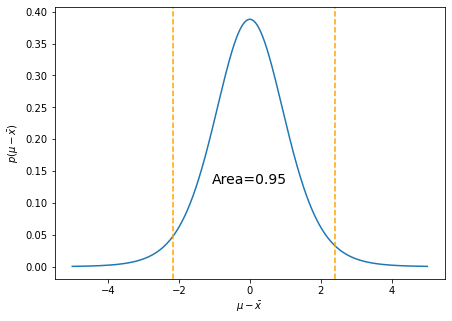

In [ ]:
# Ejercicio 1.2

Z1 = abs(ss.t.ppf((1-0.96)/2,N-1))
Z2 = -abs(ss.t.ppf((1-0.94)/2,N-1))

plt.figure(figsize=(7, 5))
plt.plot(x,y)  
plt.text(0,np.max(y) / 3, 'Area=0.95', fontdict={'size':14}, horizontalalignment='center')
plt.axvline(Z1, linestyle='--', color='orange')
plt.axvline(Z2, linestyle='--', color='orange')
plt.ylabel(r'$p(\mu - \bar{x})$')
plt.xlabel(r'$\mu - \bar{x}$')
plt.show() 

**1.3 [1 punto]:** Empezando por el valor de la variable aleatoria que proporciona un 95% de nivel de confianza a la izquierda de la distribución t-student, desplaza uniformemente este valor y determina cómo evoluciona el extremo izquierdo cuando éste se determina para conservar el 95% de nivel de confianza en el intervalo considerado. Haz una gráfica del límite izquierdo vs límite derecho (x,y).

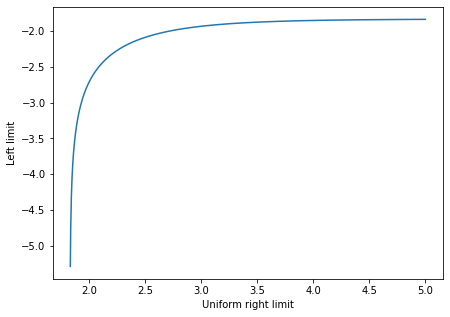

In [ ]:
# Ejercicio 1.3

yup = abs(ss.t.ppf(0.95,N-1))
xscan = np.linspace(yup,5, 1000)

yprob = ss.t.cdf(xscan,N-1)
ylow = ss.t.ppf(yprob-0.95,N-1)

plt.figure(figsize=(7, 5))
plt.plot(xscan,ylow)
plt.xlabel(r'Uniform right limit')
plt.ylabel(r'Left limit')
plt.show() 

## <font color='green'>**> Ejercicio #2 [3.5 puntos]**</font>

El grosor de la mecha ($\zeta$) de una marca de petardos sigue una distribución gaussiana $G(\mu=5\text{mm},\sigma=0.5\text{mm})$ y la longitud de la mecha ($L$) sigue otra gaussiana $G(\mu=50\text{mm},\sigma=5\text{mm})$. Si consideramos que la mecha prende siguiendo un movimiento rectilíneo uniforme:

$$
  l(t) = L - v t
$$

donde $L$ es la longitud de la mecha, $t=0$ es el momento en el que se prende la mecha, $l=0$ determina cuando explota el petardo y la velocidad está definida como:

$$
  v = \frac{A}{\zeta} \,\,\,\,\,,\,\,\,\, A \equiv 50 \, \text{mm}^2 \text{s}^{-1} \,\,,\,\, \zeta \, \text{es el grosor de la mecha.}
$$

**2.1 [1 punto]:** Genera dos listas con $N = 10000$ valores distribuidos como el grosor y la longitud de la mecha (asegúrate de que no haya valores negativos).

In [ ]:
# Ejercicio 2.1

N = 10000
g = np.array([-1])
L = np.array([-1])

while len(g[g<0]) > 0 or len(L[L<0]) > 0:
  g = np.random.normal(5,0.5,N)
  L = np.random.normal(50,5,N)

**2.2 [1 punto]:** Para cada pareja de valores de grosor y longitud, calcula el valor de tiempo $T$ que tarda en explotar el petardo correspondiente. Dibuja un histograma de los valores de $T$. Cuál es el valor medio de $T$?

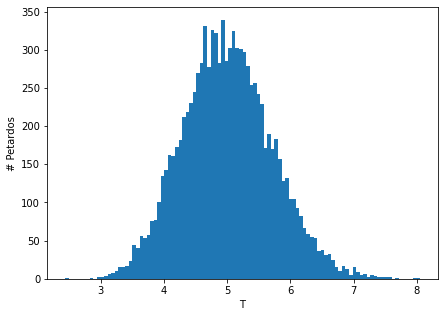

El valor medio de T es de 5.01 segundos


In [ ]:
# Ejercicio 2.2

A = 50
T = L /(A/g)

plt.figure(figsize=(7, 5))
plt.hist(T,bins=100)
plt.xlabel("T")
plt.ylabel("# Petardos")
plt.show()

print("El valor medio de T es de {:.2f} segundos".format(np.mean(T)))

**2.3 [1.5 puntos]:** Si lanzamos los petardos verticalmente hacia arriba con una velocidad de $30$ m/s, sabemos que la distancia vertical que recorren sigue:

$$
  y(t) = 30 \, t - \frac{1}{2} \, 9.81 \, t^2
$$

Dibuja un histograma de los valores de $y$ para los cuales el petardo estalla. Qué proporción de petardos llega al suelo antes de estallar?

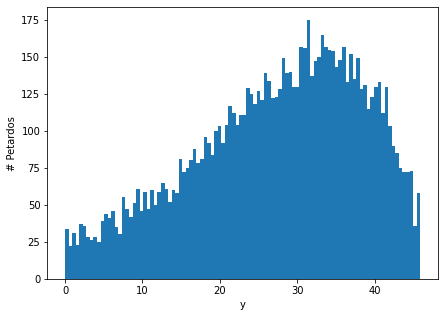

Un 6.31 % de petardos llegan al suelo sin explotar


In [ ]:
# Ejercicio 2.3

y_explotar = 30*T - 0.5*9.81*T*T

plt.figure(figsize=(7, 5))
plt.hist(y_explotar[y_explotar > 0],bins=100)
plt.xlabel("y")
plt.ylabel("# Petardos")
plt.show()

print("Un {} % de petardos llegan al suelo sin explotar".format(100*len(y_explotar[y_explotar <= 0])/len(y_explotar)))

## <font color='green'>**> Ejercicio #3 [3.5 puntos]**</font>

Sean $x_1$, $x_2$, ..., $x_n$ unas variables aleatorias de tamaño $n$ que siguen una función de densidad de probabilidad $f(x,\alpha)$ según:
	    
$$
f(x,\alpha) = \alpha\cdot(1-x), \quad 0 \le x \le 1, \quad \alpha > 0
$$

**3.1 [1 punto]:** Calcula el valor de $\alpha$ para que $f(x,\alpha)$ sea una *pdf*. Utiliza ese valor de $\alpha$ y calcula la función cumulativa F(x). Dibuja las gráficas de f(x) y F(x) para $x$ en el intervalo [0.,1.].

*Ejercicio 3.1: Cálculo de $\alpha$. Desarrollo*:

$$
I = \int_{0}^{1} f(x, \alpha) = \int_{0}^{1} \alpha\cdot(1-x) = \alpha |x-0.5\cdot x^2|_{0}^{1} = 0.5 \cdot \alpha = 1 
$$

Para cumplir la igualdad $\alpha$ = 2.


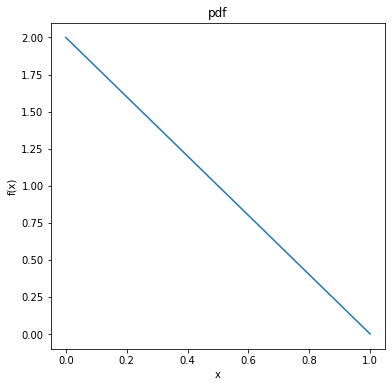

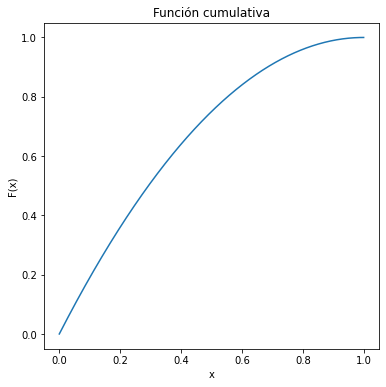

In [ ]:
# Ejercicio 3.1

def f(x):
    return 2*(1-x)

def Fcum(x):
    return 2.*(x-0.5*x**2)

x = np.linspace(0,1.,1000)

plt.figure(figsize=(6, 6))
plt.plot(x,f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("pdf")
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(x,Fcum(x))
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Función cumulativa")
plt.show()

**3.2 [1 punto]:** Usa el método de transformación para generar $10^7$ números aleatorios que sigan esta distribución $f(x)$. Dibuja un histograma normalizado de tus valores ($x\in[0.,1.]$), con 50 bines, y dibuja encima la f(x).

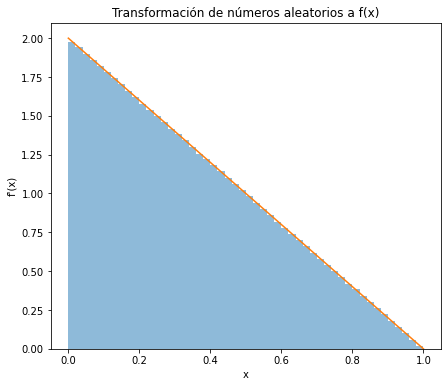

In [ ]:
# Ejercicio 3.2 

N = 10**7 # Número de puntos a generar

xunif = np.random.uniform(0,1,N) # Generamos números entre 0 y 1 que siguen una dist. uniforme

def ft(x): # función transf. usando def
  return 1-np.sqrt(1-x)

xt = ft(xunif) # Aquí cogemos el array xunif, y lo convertimos en otro array transformado

plt.figure(figsize=(7, 6))
plt.hist(xt, bins=50, range=[0,1], alpha=0.5, density=True) # voilà!
plt.plot(x,f(x))
plt.title("Transformación de números aleatorios a f(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.show()

**3.3 [1.5 puntos]:** Para un histograma se pueden obtener los contenidos de cada bin usando

```
n, bins, patches = plt.hist(p, bins=M, density=True, alpha=0.5) # Ejemplo
```

*n* será un array de M elementos que contiene el contenido en *y* de cada uno de los bines. Con esta información podemos calcular la suma de la diferencia absoluta para cada bin entre su contenido y lo esperado por la distribución de este ejercicio, en el centro de cada bin. Es decir:

$$
D = \sum_{i=0}^{M} |n_i-f(\bar{x}_i)| \,, \, \text{donde } \bar{x}_i \, \text{es el valor central del bin $i$} 
$$

Haz una gráfica que muestre como evoluciona esta "distancia" $D$ si generamos diferentes muestras, en orden creciente de $N$. Genera muestras en el intervalo $N = [10,500]$, en saltos de 5, calcula $D$ para cada una de estas realizaciones, usando un histograma entre [0.,1.] con 200 bines, y haz una gráfica de $D$ vs. $N$, usando escala logarítmicas en los dos ejes. Recuerda que puedes anular que se muestre una gráfica usando *plt.close()* en vez de *plt.show()*.


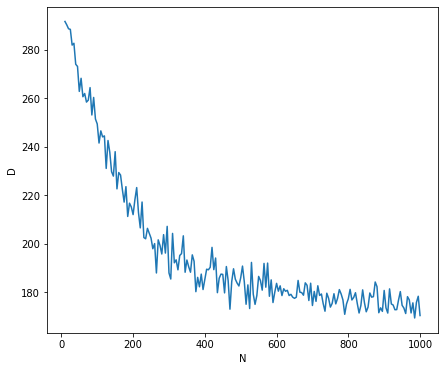

In [ ]:
# Ejercicio 3.3

Ninf = 10
Nsup = 1000
Nstep = 5
Da = []
Na = []

for N in range (Ninf,Nsup+Nstep,Nstep):
  xunif = np.random.uniform(0,1,N) # Generamos números entre 0 y 1 que siguen una dist. uniforme
  xt = ft(xunif) # Aquí cogemos el array xunif, y lo convertimos en otro array transformado

  n, bins, patches = plt.hist(xt, bins=200, range=[0.,1], alpha=0.5, density=True)
  plt.close()

  delta_x = bins[1] - bins[0]
  x_star = bins[:-1]+delta_x/2.
  Da.append(np.sum(np.abs(n-x_star)))
  Na.append(N)

plt.figure(figsize=(7, 6))
plt.plot(Na,Da)
plt.ylabel("D")
plt.xlabel("N")
#plt.yscale('log')
#plt.xscale('log')
plt.show()